In [72]:
HOMEPOS = {'peaks': [71010.6292271651], 
           'x': [1973.2404437789528], 
           'y': [876.9613588322487], 
           'fwhm': [3.22281051478188], 
           'energy': [3.4920851840174745]}

In [84]:
from astropy.io import fits
import os
from spotfinder import spotfinder
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import math
# import sys 
# sys.path.append("/data/common/software/products/")
import sbigCam as sbc
import time
import pandas as pd
from scipy.stats import norm
import matplotlib.colors as mcolors
import circle_fit as cf

plt.rcParams.update({"figure.dpi":130})

In [85]:
picspath = "/home/msdos/um_scripts/sbigpics/tests/"


files=glob(f'{picspath}/*.fits') #grab the files from the new directory
files.sort() #make sure files are in the order they were created
print(files[-4:])
# files = files[-1:]

['/home/msdos/um_scripts/sbigpics/tests/20230120-134814.fits', '/home/msdos/um_scripts/sbigpics/tests/20230120-134822.fits', '/home/msdos/um_scripts/sbigpics/tests/20230120-144736.fits', '/home/msdos/um_scripts/sbigpics/tests/20230120-145535.fits']


In [86]:
expected_spot_count = 1

xdata=[]
ydata=[]
peaksdata=[]
fwhmdata=[]
energy=[]

In [87]:
#spotfinder
xx, yy, peaks, fwhm, energy = [],[],[],[],[]
for file_name in files:
    print("********",file_name)
    try: #try to detect the spot
        sf=spotfinder.SpotFinder(file_name, expected_spot_count)
        centroids = sf.get_centroids(print_summary = True, region_file='regions.reg')
        print(centroids)
        #separate dictionaries for plotting purposes
        res = dict((k, centroids[k]) for k in ['x']
                                        if k in centroids)
        res2 = dict((k, centroids[k]) for k in ['y']
                                        if k in centroids)
        x =[value[i] for value in res.values()
         for i in range(expected_spot_count)]
        xx.append(x)
    
        y =[value[i] for value in res2.values()
         for i in range(expected_spot_count)]
        yy.append(y)
    except: #ignore photo if an error is raised
        pass

******** /home/msdos/um_scripts/sbigpics/tests/20230120-134727.fits
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 74019.39905249028 brightness appears out of expected range
 File: /home/msdos/um_scripts/sbigpics/tests/20230120-134727.fits
 Number of centroids requested: 1
 Fitboxsize: 7
 Centroid list:
 Spot  x          y         FWHM    Peak     LD  
    0  1811.517   940.144   3.41    74019    3.85 
 Min peak   : 74019.40 
 Max peak   : 74019.40 
 Mean peak  : 74019.40 
 Sigma peak :     0.00 
here
{'peaks': [74019.39905249028], 'x': [1811.5167156805423], 'y': [940.1440194651359], 'fwhm': [3.4080592457136416], 'energy': [3.8492789700619063]}
******** /home/msdos/um_scripts/sbigpics/tests/20230120-134734.fits
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73468.43886735837 brightness appears out of expected range
 File: /home/msdos/um_scripts/sbigpics/tests/20230120-134734.fits
 Number of centroids requested: 1
 Fitboxsize: 7
 Centroid list:
 Spot  x  

In [88]:
len(xx)

10

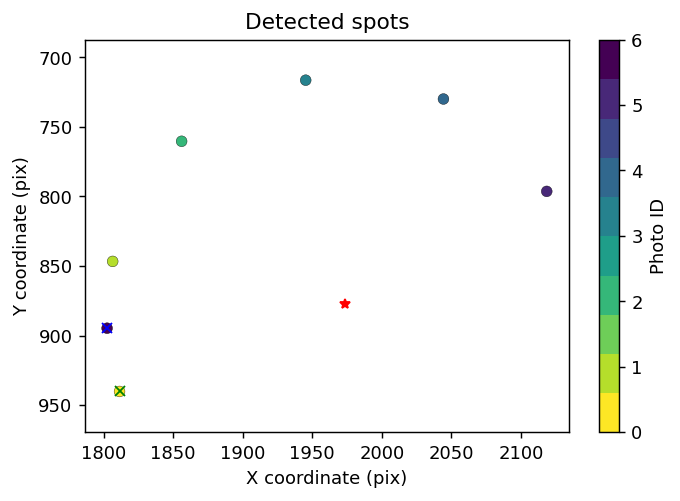

In [94]:
#plot the detected spots, color order indicates order of photos

cmap = plt.cm.get_cmap("viridis_r", len(xx))
plt.scatter(xx[:7], yy[:7], c=np.arange(7), cmap=cmap, edgecolor='k', linewidth=0.2)
plt.plot(HOMEPOS['x'], HOMEPOS['y'], 'r*', zorder=0 )
plt.plot(xx[8], yy[8], 'bx')
plt.plot(xx[9], yy[9], 'gx')


plt.colorbar(label ='Photo ID')
plt.title('Detected spots')
plt.xlabel('X coordinate (pix)')
plt.ylabel('Y coordinate (pix)')
plt.gca().invert_yaxis()

plt.axis('equal')
plt.show()

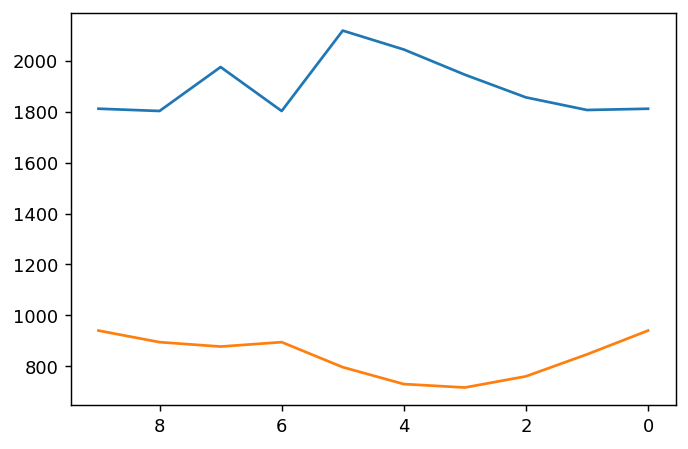

In [92]:

plt.plot(xx)
plt.plot(yy)
plt.gca().invert_xaxis()


In [108]:
def find_spot(fitsname, fitspath,  
              expected_spot_count=1, 
              regionsname='regions.reg', 
              verbose=False):
    """
    spotfinder handler
    input:
        fitsname:
        fitspath (str): relative or full path to the folder
        regionsname (str):
        verbose (bool):
    output: 
        centroids (dict): raw output from spotfinder

    """

    _ifn = f"{fitspath}/{fitsname}"

    if expected_spot_count != 1:
        raise NotImplementedError("This mode wasn't tested here")
    try: 
        sf=spotfinder.SpotFinder(_ifn, expected_spot_count)
        centroids = sf.get_centroids(print_summary = verbose, 
                                     region_file=regionsname)
        if verbose: print(centroids)
    
    except: #ignore photo if an error is raised
        print("Warning: spot not found ")
        inval_number = np.nan
        return {  'peaks': [inval_number], 
                      'x': [inval_number], 
                      'y': [inval_number], 
                   'fwhm': [inval_number], 
                 'energy': [inval_number]} 
    return centroids

def collect_xy(files):
    # treating for single file
    if isinstance(files, str):
        files = [files]
    x2, y2 = [],[]
    for fullname in files:
        iname = fullname.split('/')[-1]
        _c = find_spot(iname, picspath)
        x2.append(_c['x'])
        y2.append(_c['y'])
    return x2, y2

In [104]:
x2, y2 = [],[]
for fullname in files:
    iname = fullname.split('/')[-1]
    _c = find_spot(iname, picspath)
    x2.append(_c['x'])
    y2.append(_c['y'])

Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 74019.39905249028 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73468.43886735837 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 71546.78491219247 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 71475.49161103978 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 70579.45668847792 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 75843.12296887694 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73727.84504419233 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot

In [107]:
np.alltrue(np.array(xx) == np.array(x2)), np.alltrue(np.array(yy) == np.array(y2))

(True, True)

In [110]:
x3, y3 = getxy(_c)

Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 74019.39905249028 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73468.43886735837 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 71546.78491219247 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 71475.49161103978 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 70579.45668847792 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 75843.12296887694 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73727.84504419233 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot

In [112]:
np.array(x2)==np.array(x3), np.array(y2)==np.array(y3)

(array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

True